In [7]:
def print_max(a,b):
    if(a>b):
        print(a)
    elif(a<b):
        print(b)
    else:
        print("equal")
    while a<b:
        a=a+1
        print("dekho ami pari while loop")

print_max(2,5)

5
dekho ami pari while loop
dekho ami pari while loop
dekho ami pari while loop


In [8]:
x = [[1, 2, 3, 4, 5], [21, 22, 23, 24, 25], [31, 32, 33, 34, 35]]

In [18]:
print(x[2])
print(x[1][2])
print(x[1][1:3])
print(x[0][1:5:3]) # kottheke shuru : kothay shesh : kotokore increment

[31, 32, 33, 34, 35]
23
[22, 23]
[2, 5]


In [26]:
y=[0,0,0]
for i in range(0,len(x)):
    y[i]=sum(x[i])/len(x[i])
print(y)

[3.0, 23.0, 33.0]


In [28]:
x = [1, 3, 5, 6, 7, 8, 6, 1, 2, 3] 
y = [0, 0, 0, 0, 0, 0, 0, 0] 

i=0
while i<len(y):
    y[i]=sum(x[i:i+3])/3
    i=i+1
    
print(y)


[3.0, 4.666666666666667, 6.0, 7.0, 7.0, 5.0, 3.0, 2.0]


In [92]:
import cv2

cv2_img=cv2.imread('Images/logo.png',0)

cv2.imshow("Logo",cv2_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

color=cv2.imread('Images/logo.png',1)
cv2.imwrite("color_logo.png",color)


True

In [49]:
org.resize((150,150),resample=Image.BILINEAR).save('ironman_150.png')

RGB
(800, 585)
WEBP


(800, 585)

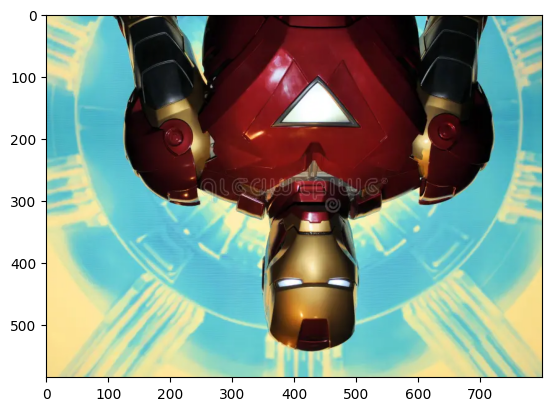

In [55]:
from PIL import Image
import matplotlib.pyplot as plt
org=Image.open('Images/ironman.png')

print(org.mode)
print(org.size)
print(org.format)

vertical=org.rotate(20)

lrtrans=org.transpose(method=Image.FLIP_TOP_BOTTOM)
plt.imshow(lrtrans)

org.size

In [60]:
org.size

(800, 585)

In [69]:
org.crop((50,50,500,580)).show() #LTRB

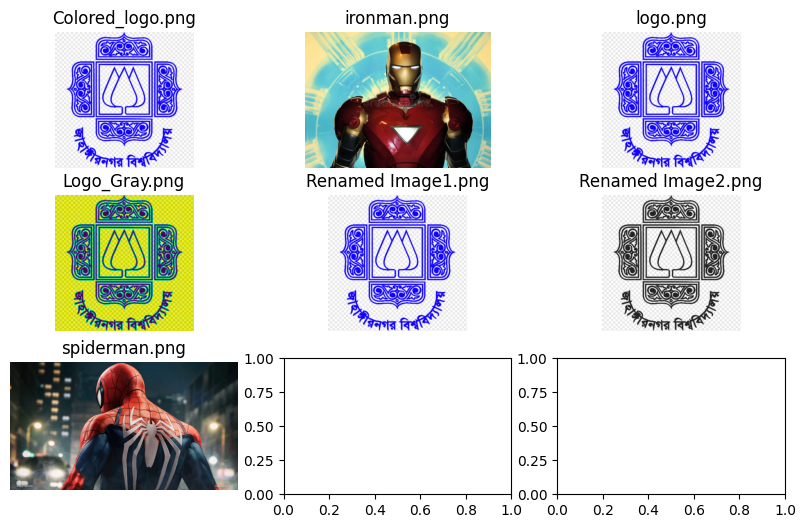

In [105]:
import os
filenames=os.listdir('Images')
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(10,6))
axs=axs.flatten()
for i in range(0,len(filenames)):
    img=Image.open(os.path.join('Images',filenames[i]))
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(filenames[i])

c_image=cv2.imread('Images/ironman.png',1)
c_image=cv2.cvtColor(c_image,cv2.COLOR_BGR2RGB)
pil_image=Image.fromarray(c_image)
pil_image.show()


In [106]:
R,G,B=cv2.split(c_image)

In [116]:
import glob
glob.glob('Images/[c]*.png')

['Images\\Colored_logo.png']

In [117]:
my_list=[]
for filename in glob.glob('Images/*.png'):
    print(filename)

Images\Colored_logo.png
Images\ironman.png
Images\logo.png
Images\Logo_Gray.png
Images\Renamed Image1.png
Images\Renamed Image2.png
Images\spiderman.png


In [126]:
for root,dirs,files in os.walk('.'):
    print(root)

.
.\.ipynb_checkpoints
.\Images


In [136]:
x=cv2.resize(cv2_img, None,fx=0.1255,fy=0.1255,interpolation=cv2.INTER_AREA)
xd=Image.fromarray(x)
xd.show()

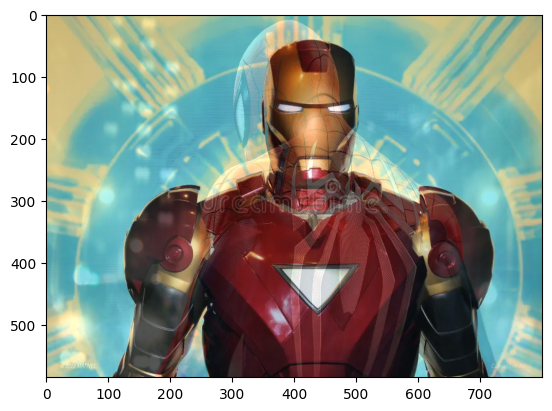

In [161]:
iron=cv2.imread('Images/ironman.png')
spider=cv2.imread('Images/spiderman.png')
spider=cv2.resize(spider,(iron.shape[1],iron.shape[0]))

merged=cv2.addWeighted(spider,0.3,iron,0.8,1)

plt.imshow(cv2.cvtColor(merged,cv2.COLOR_BGR2RGB))

In [146]:
iron.shape

(1080, 1920, 3)

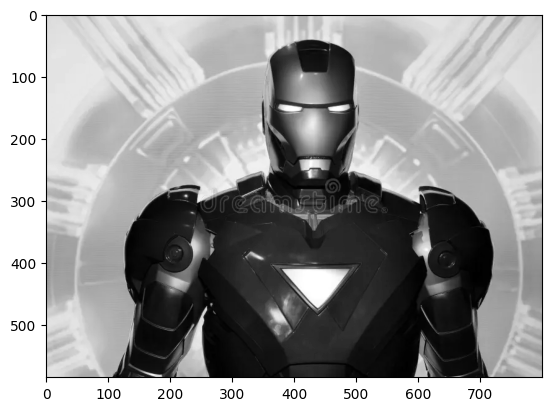

In [179]:
from skimage import io,color
from skimage.transform import resize, rescale, downscale_local_mean
from skimage.filters import gaussian,sobel
sk_image=io.imread('Images/ironman.png',as_gray=True)
plt.imshow(sk_image,cmap='gray')

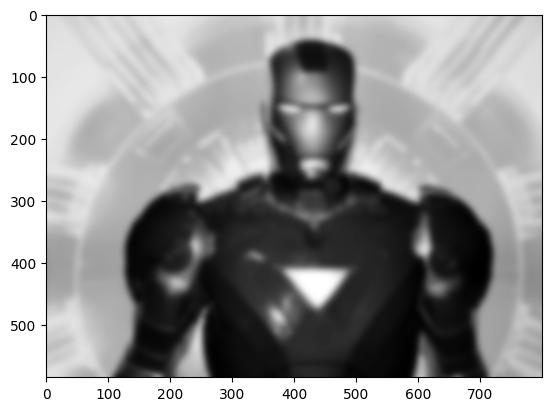

In [180]:
gauss_image=gaussian(sk_image,
    sigma=5,
    mode='nearest',
    cval=0,
    channel_axis=None,)
plt.imshow(gauss_image,cmap='gray')

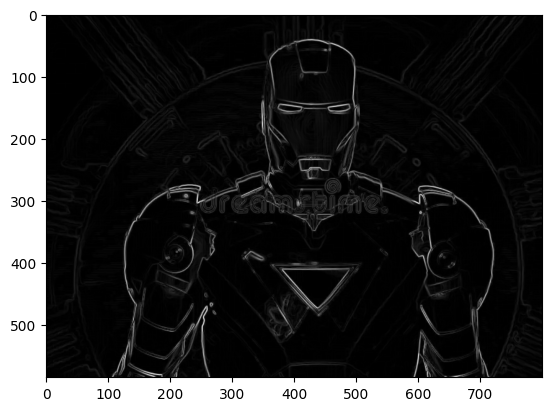

In [185]:
sobel_image=sobel(sk_image)
plt.imshow(sobel_image,cmap='gray')

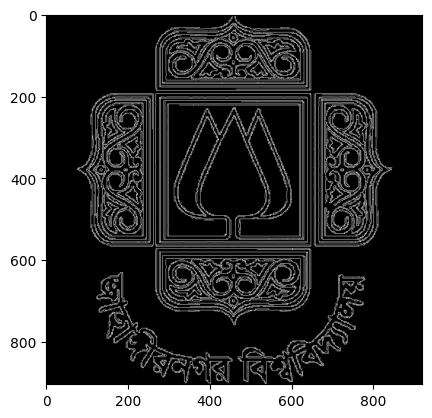

In [189]:
plt.imshow(cv2.Canny(cv2_img, 100,500),cmap='gray')

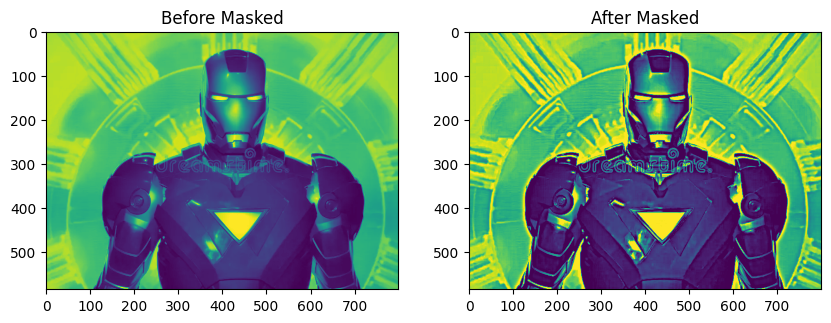

In [194]:
from skimage.filters import unsharp_mask
masked=unsharp_mask(sk_image,
    radius=5.0,
    amount=3.0)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Before Masked')
plt.imshow(sk_image)
plt.subplot(122)
plt.title('After Masked')
plt.imshow(masked)

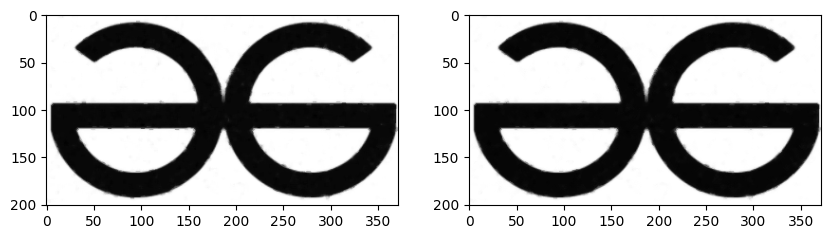

In [206]:
salty_img=io.imread('Images/salty_e4.jpg',as_gray=True)
salty_img1=cv2.imread('Images/salty_e4.jpg',0)
from skimage.filters import median
from skimage.morphology import disk
mediand=median(salty_img,disk(3))
cv2_med=cv2.medianBlur(salty_img1,5)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(cv2_med,cmap='gray')
plt.subplot(122)
plt.imshow(mediand,cmap='gray')

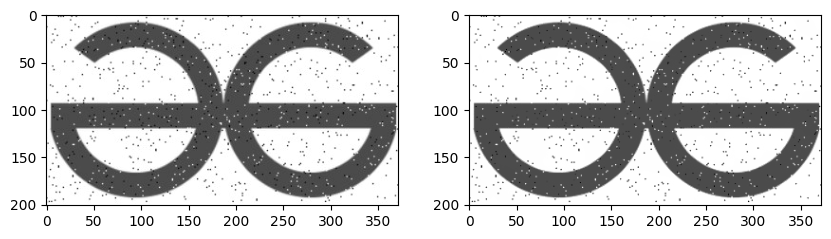

In [215]:
from skimage.restoration import denoise_bilateral
bilateral_img=denoise_bilateral(salty_img,
    sigma_color=0.05,
    sigma_spatial=15,
    mode='constant',
    cval=0)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(salty_img,cmap='gray')
plt.subplot(122)
plt.imshow(bilateral_img,cmap='gray')

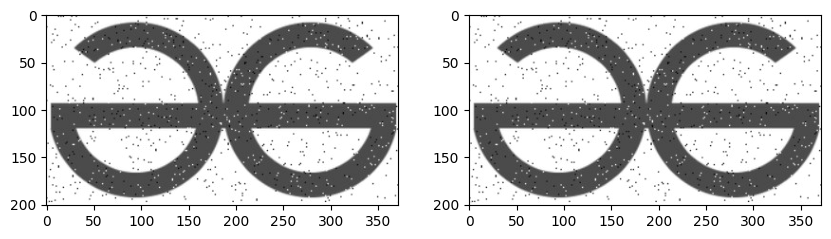

In [219]:
from skimage.restoration import denoise_nl_means,estimate_sigma
import numpy as np
sigma_est=np.mean(estimate_sigma(salty_img,channel_axis=True))
nlm_img=denoise_nl_means(salty_img,
    patch_size=7,
    patch_distance=11,
    h=0.1*sigma_est,
    fast_mode=True,
    sigma=0.0,
    channel_axis=None,)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(salty_img,cmap='gray')
plt.subplot(122)
plt.imshow(nlm_img,cmap='gray')

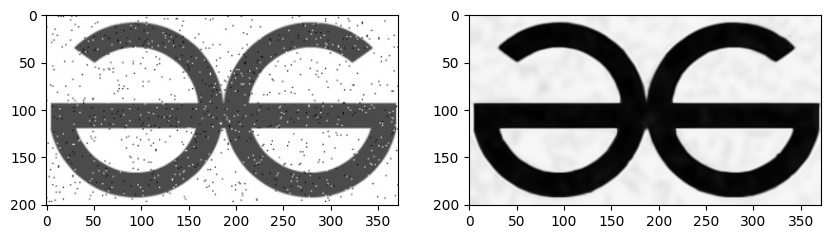

In [224]:
import bm3d
from skimage import img_as_float
salty=img_as_float(salty_img)
bm=bm3d.bm3d(salty,sigma_psd=0.3)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(salty_img,cmap='gray')
plt.subplot(122)
plt.imshow(bm,cmap='gray')

In [256]:
def rgb_to_cmyk(r, g, b):

    r1 = r / 255.0
    g1 = g / 255.0
    b1 = b / 255.0
    
    k = 1- max(r1, g1, b1)
    c = 1-(r1/max(r1,g1,b1))
    m = 1-(g1/max(r1,g1,b1))
    y=  1-(b1/max(r1,g1,b1))

    return c * 100, m * 100, y * 100, k * 100

rgb_to_cmyk(193, 174, 186)

(0.0, 9.844559585492219, 3.626943005181349, 24.31372549019608)

C:\Users\shawo\AppData\Local\Temp\ipykernel_7152\1298445834.py:13: RuntimeWarning: invalid value encountered in divide
  C = 1- (R/(1-K))
C:\Users\shawo\AppData\Local\Temp\ipykernel_7152\1298445834.py:14: RuntimeWarning: invalid value encountered in divide
  M= 1- (G/(1-K))
C:\Users\shawo\AppData\Local\Temp\ipykernel_7152\1298445834.py:15: RuntimeWarning: invalid value encountered in divide
  Y = 1- (B/(1-K))
C:\Users\shawo\AppData\Local\Temp\ipykernel_7152\1298445834.py:17: RuntimeWarning: invalid value encountered in cast
  cmyk = (np.dstack((C, M, Y, K)) * 255).astype(np.uint8)


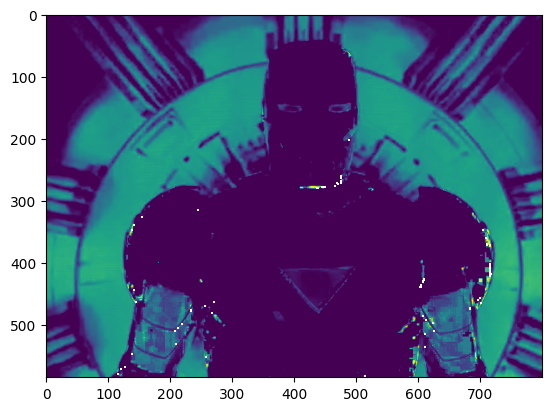

In [294]:
import cv2
import numpy as np

def rgb_to_cmyk(image):
    
    B,G,R=cv2.split(image)
    B=B/255.0
    G=G/255.0
    R=R/255.0

    K = 1- np.max(np.stack([B, G, R], axis=-1), axis=-1)

    C = 1- (R/(1-K))
    M= 1- (G/(1-K))
    Y = 1- (B/(1-K))

    cmyk = (np.dstack((C, M, Y, K)) * 255).astype(np.uint8)
    return cmyk

# Read the image using OpenCV
image = cv2.imread('Images/ironman.png')
cmyk_image = rgb_to_cmyk(image)

plt.imshow(C)


In [295]:
from skimage import io, filters, feature 
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
import cv2 
import numpy as np 
img = cv2.imread('Images/ironman.png', 0) 
#Canny 
canny_edge = cv2.Canny(img, 50, 80) #Supply Thresholds 1 and 2 
#Autocanny 
sigma = 0.3 
median = np.median(img) 
# apply automatic Canny edge detection using the computed median 
lower = int(max(0, (1.0 - sigma) * median)) 
#Lower threshold is sigma % lower than median 
#If the value is below 0 then take 0 as the value 
upper = int(min(255, (1.0 + sigma) * median)) 
#Upper threshold is sigma% higher than median 
#If the value is larger than 255 then take 255 as the value
auto_canny = cv2.Canny(img, lower, upper)  #importnant
cv2.imshow("Canny", canny_edge) 
cv2.imshow("Auto Canny", auto_canny) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


In [296]:
from skimage.filters import prewitt,sobel,farid,roberts,scharr

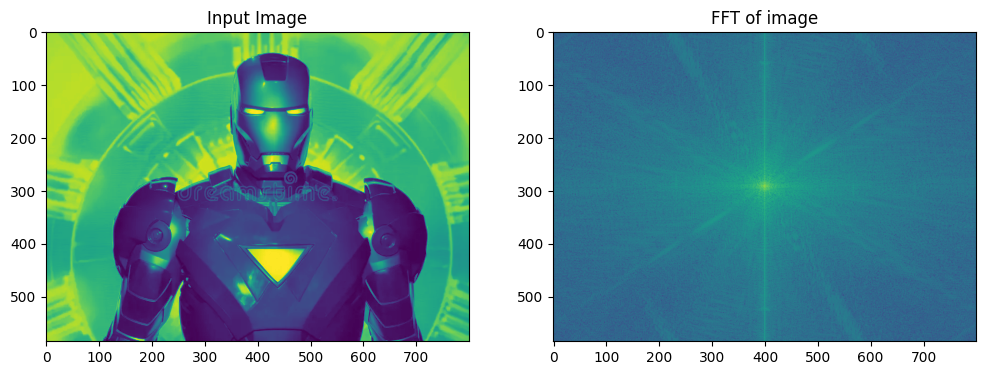

In [304]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('Images/ironman.png', 0) 

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT) 
dft_shift = np.fft.fftshift(dft) 
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 
1]))+1) 

fig = plt.figure(figsize=(12, 12)) 
ax1 = fig.add_subplot(2,2,1) 
ax1.imshow(img) 
ax1.title.set_text('Input Image') 
ax2 = fig.add_subplot(2,2,2) 
ax2.imshow(magnitude_spectrum) 
ax2.title.set_text('FFT of image') 
plt.show()

C:\Users\shawo\AppData\Local\Temp\ipykernel_7152\636080917.py:58: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


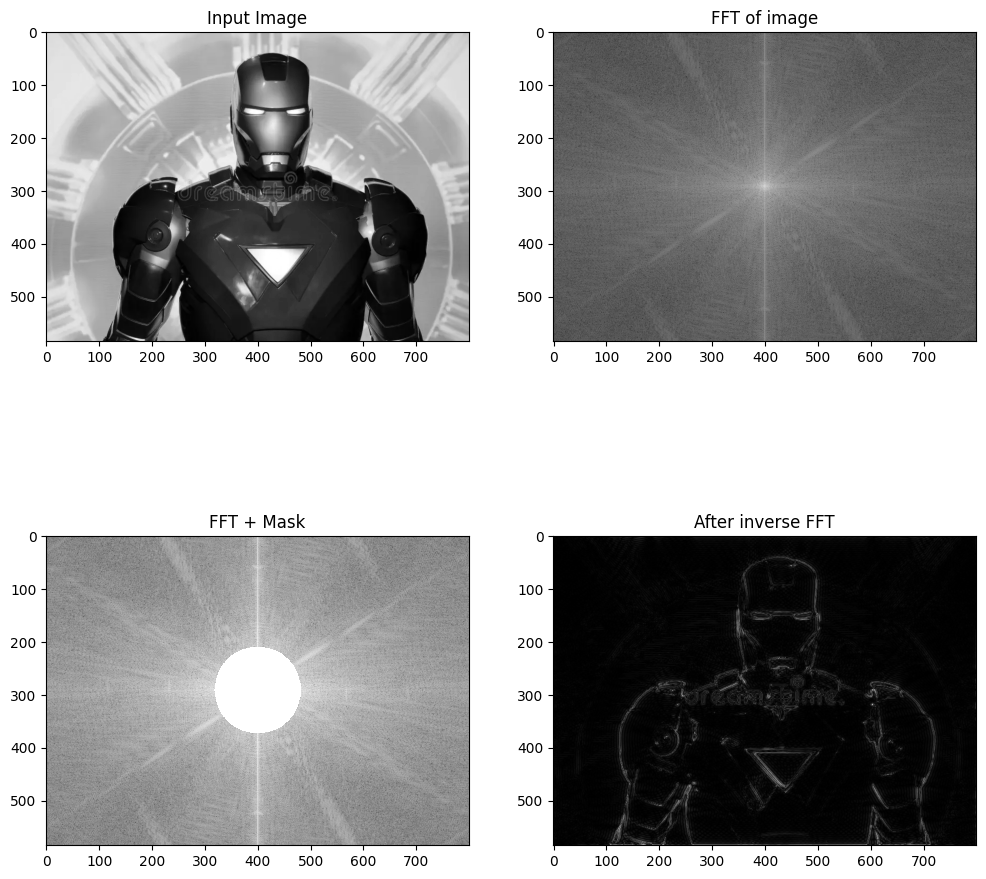

In [305]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread('Images/ironman.png', 0) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

#hpf
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#
"""
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
"""


# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()